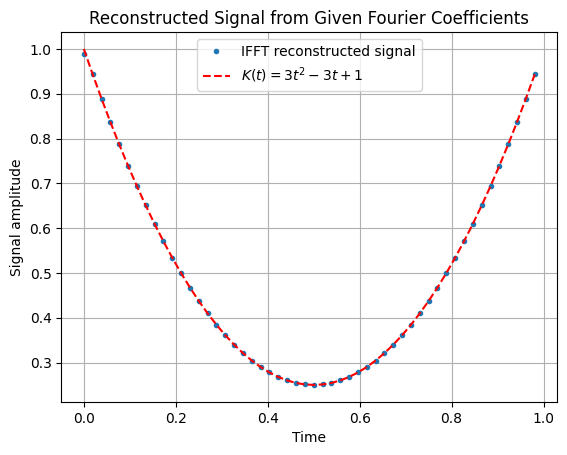

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of sample points (and Fourier coefficients)
N = 52  
# Sampling interval (for example, suppose our total time is 1 second)
T = 1.0  
d = T / N

# Get the frequency bins. These tell us which Fourier mode (l) corresponds to each index.
freqs = np.fft.fftfreq(N, d=d)

# Initialize an array for the Fourier coefficients
F = np.empty(N, dtype=complex)

# Set the Fourier coefficients:
# For l = 0, set coefficient to 1/2.
# For nonzero l, set coefficient to 1/(|l|^2).
for k, l in enumerate(freqs):
    if l == 0:
        F[k] = 1/2
    else:
        F[k] = 3 / (2*np.pi**2 * abs(l)**2)

# Now, compute the inverse FFT to reconstruct the time-domain signal.
# The result is complex-valued; if the coefficients are set symmetrically,
# the imaginary part should be negligible (numerical noise).
signal = np.fft.ifft(F*N)

# --- Define the time grid and the analytical function ---
t = np.linspace(0, T, N, endpoint=False)
K_t = 3*t**2 - 3*t + 1  # the expected Sobolev kernel on [0,1]

# For visualization, we'll plot the real part of the reconstructed signal.
plt.plot(np.linspace(0, T, N, endpoint=False), signal.real, '.', label='IFFT reconstructed signal')
plt.plot(t, K_t, 'r--', label=r'$K(t)=3t^2-3t+1$')
plt.xlabel("Time")
plt.ylabel("Signal amplitude")
plt.title("Reconstructed Signal from Given Fourier Coefficients")
plt.grid(True)
plt.legend()
plt.show()


/home/emilia/.local/miniconda3/envs/conv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/emilia/.local/miniconda3/envs/conv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


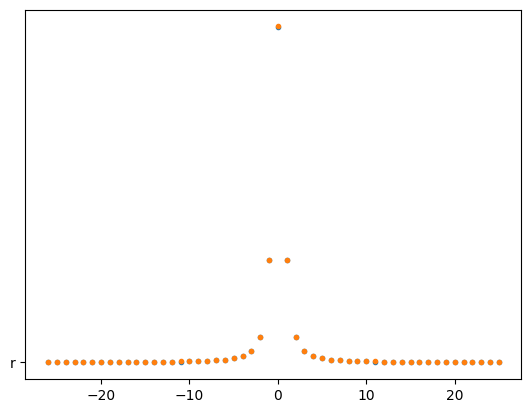

In [18]:
from fourier import compute_fourier_coeff
#plot the fourier coefficinets:
plt.plot(freqs, (F), '.')
plt.plot(freqs, (compute_fourier_coeff(K_t,T)), '.', 'r')

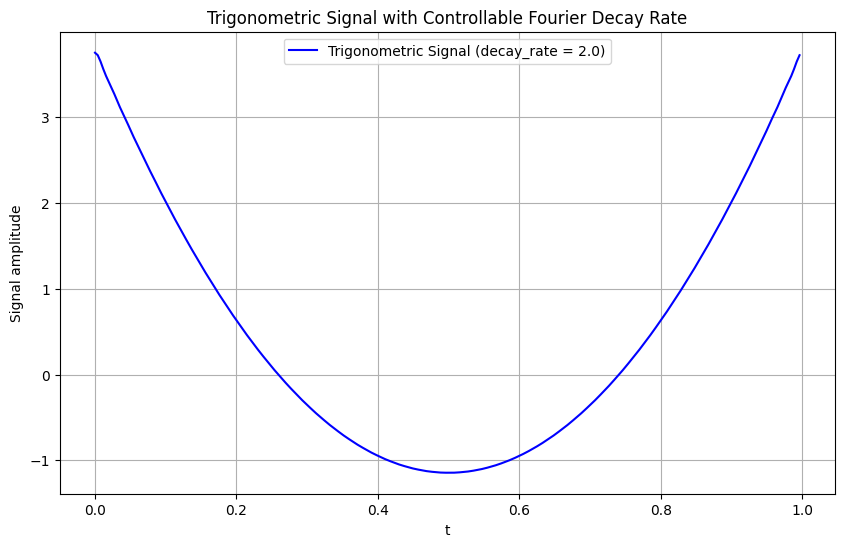

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
N = 256              # Number of time samples over one period [0,1)
t = np.linspace(0, 1, N, endpoint=False)
num_terms = 50      # Number of terms in the Fourier series (you can increase this for more accuracy)
decay_rate = 2.0     # Decay rate, i.e. Fourier coefficients ~ 1/|l|^decay_rate

# --- Construct the signal ---
# For an even function, the Fourier series is given by:
#   f(t) = c_0 + 2 * sum_{l=1}^{num_terms} (1/l^decay_rate) * cos(2*pi*l*t)
# where c_0 = 1/2
signal_cos = np.full_like(t, 1/2)  # Start with the DC term

for ell in range(1, num_terms + 1):
    signal_cos += 2 * (1 / ell**decay_rate) * np.cos(2 * np.pi * ell * t)

# --- Plot the result ---
plt.figure(figsize=(10, 6))
plt.plot(t, signal, 'b-', label=f"Trigonometric Signal (decay_rate = {decay_rate})")
plt.xlabel("t")
plt.ylabel("Signal amplitude")
plt.title("Trigonometric Signal with Controllable Fourier Decay Rate")
plt.legend()
plt.grid(True)
plt.show()


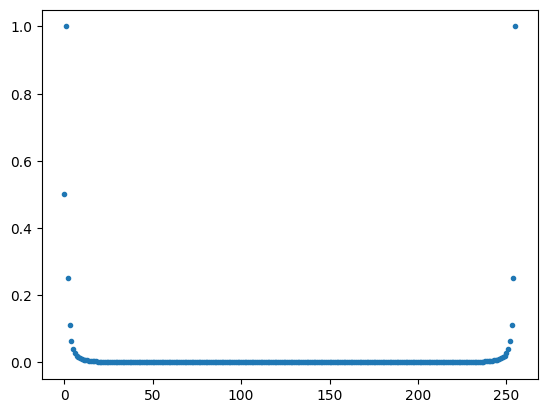

In [69]:
#plot fourier coefficients of sig
freqs = np.fft.fftfreq(N, d=T/N)
plt.plot( (compute_fourier_coeff(signal_cos,1)), '.')